In [1]:
from sklearn.datasets import make_circles
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import plot_model

In [3]:
def plot_data(pl,X,y):
    pl.plot(X[y==0,0],X[y==0,1],'ob',alpha=0.5)
    pl.plot(X[y==1,0],X[y==1,1],'xr',alpha=0.5)
    pl.legend(['0','1'])
    return pl

def plot_decision_boundary(model, X, y):

    amin, bmin = X.min(axis=0) - 0.1
    amax, bmax = X.max(axis=0) + 0.1
    hticks = np.linspace(amin, amax, 101)
    vticks = np.linspace(bmin, bmax, 101)
    
    aa, bb = np.meshgrid(hticks, vticks)
    ab = np.c_[aa.ravel(), bb.ravel()]
    
    # make prediction with the model and reshape the output so contourf can plot it
    c = model.predict(ab)
    Z = c.reshape(aa.shape)

    plt.figure(figsize=(12, 8))
    # plot the contour
    plt.contourf(aa, bb, Z, cmap='bwr', alpha=0.2)
    # plot the moons of data
    plot_data(plt, X, y)

    return plt

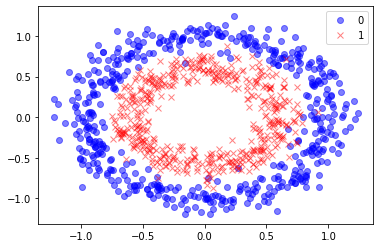

In [5]:
X,y = make_circles(n_samples=1000,factor=.6,noise=0.1,random_state=1)
p1 = plot_data(plt,X,y)
p1.show()

In [6]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=1)

# Import model an input layer to use the funtional API

In [10]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

In [24]:
input = Input(shape=(2,),name="InputLayer")

layer1 = Dense(units=4,name="Layer1",activation="tanh",)(input)

layer2 = Dense(units=4,name="Layer2",activation="tanh",)(layer1)

output = Dense(units=1,name="output",activation="sigmoid",)(layer2)

fun_model = Model(input,output)

In [25]:
fun_model.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
InputLayer (InputLayer)      [(None, 2)]               0         
_________________________________________________________________
Layer1 (Dense)               (None, 4)                 12        
_________________________________________________________________
Layer2 (Dense)               (None, 4)                 20        
_________________________________________________________________
output (Dense)               (None, 1)                 5         
Total params: 37
Trainable params: 37
Non-trainable params: 0
_________________________________________________________________


In [26]:
from tensorflow.keras.callbacks import EarlyStopping
my_calback = [EarlyStopping(monitor='val_accuracy',patience=5,min_delta=1)]

In [27]:
fun_model.compile(optimizer=Adam(lr=0.05),loss='binary_crossentropy',metrics=['accuracy'],callbacks=my_calback)
fun_model.fit(X_train,y_train,epochs=200,verbose=1,validation_data=(X_test,y_test))

Train on 700 samples, validate on 300 samples
Epoch 1/200
700/700 [==============================] - 1s 2ms/sample - loss: 0.6970 - accuracy: 0.5357 - val_loss: 0.6862 - val_accuracy: 0.5167
Epoch 2/200
700/700 [==============================] - 0s 278us/sample - loss: 0.6728 - accuracy: 0.5943 - val_loss: 0.6562 - val_accuracy: 0.6367
Epoch 3/200
700/700 [==============================] - 0s 284us/sample - loss: 0.6146 - accuracy: 0.6857 - val_loss: 0.5597 - val_accuracy: 0.8033
Epoch 4/200
700/700 [==============================] - 0s 275us/sample - loss: 0.4998 - accuracy: 0.7857 - val_loss: 0.4195 - val_accuracy: 0.8500
Epoch 5/200
700/700 [==============================] - 0s 255us/sample - loss: 0.3685 - accuracy: 0.9029 - val_loss: 0.2919 - val_accuracy: 0.9600
Epoch 6/200
700/700 [==============================] - 0s 232us/sample - loss: 0.2929 - accuracy: 0.9043 - val_loss: 0.2483 - val_accuracy: 0.9300
Epoch 7/200
700/700 [==============================] - 0s 239us/sample - l

700/700 [==============================] - 0s 212us/sample - loss: 0.0843 - accuracy: 0.9700 - val_loss: 0.0819 - val_accuracy: 0.9733
Epoch 57/200
700/700 [==============================] - 0s 208us/sample - loss: 0.0983 - accuracy: 0.9671 - val_loss: 0.1000 - val_accuracy: 0.9633
Epoch 58/200
700/700 [==============================] - 0s 207us/sample - loss: 0.0888 - accuracy: 0.9743 - val_loss: 0.0823 - val_accuracy: 0.9733
Epoch 59/200
700/700 [==============================] - 0s 205us/sample - loss: 0.0805 - accuracy: 0.9729 - val_loss: 0.0905 - val_accuracy: 0.9700
Epoch 60/200
700/700 [==============================] - 0s 224us/sample - loss: 0.1001 - accuracy: 0.9657 - val_loss: 0.0693 - val_accuracy: 0.9700
Epoch 61/200
700/700 [==============================] - 0s 215us/sample - loss: 0.0914 - accuracy: 0.9686 - val_loss: 0.0941 - val_accuracy: 0.9700
Epoch 62/200
700/700 [==============================] - 0s 215us/sample - loss: 0.0867 - accuracy: 0.9714 - val_loss: 0.1357 

700/700 [==============================] - 0s 213us/sample - loss: 0.0748 - accuracy: 0.9786 - val_loss: 0.0875 - val_accuracy: 0.9800
Epoch 112/200
700/700 [==============================] - 0s 204us/sample - loss: 0.0850 - accuracy: 0.9700 - val_loss: 0.0839 - val_accuracy: 0.9800
Epoch 113/200
700/700 [==============================] - 0s 208us/sample - loss: 0.0782 - accuracy: 0.9671 - val_loss: 0.0776 - val_accuracy: 0.9733
Epoch 114/200
700/700 [==============================] - 0s 205us/sample - loss: 0.0746 - accuracy: 0.9743 - val_loss: 0.1113 - val_accuracy: 0.9600
Epoch 115/200
700/700 [==============================] - 0s 232us/sample - loss: 0.0858 - accuracy: 0.9671 - val_loss: 0.0971 - val_accuracy: 0.9667
Epoch 116/200
700/700 [==============================] - 0s 211us/sample - loss: 0.1070 - accuracy: 0.9614 - val_loss: 0.1005 - val_accuracy: 0.9700
Epoch 117/200
700/700 [==============================] - 0s 210us/sample - loss: 0.0958 - accuracy: 0.9700 - val_loss: 0

700/700 [==============================] - 0s 262us/sample - loss: 0.0764 - accuracy: 0.9757 - val_loss: 0.1026 - val_accuracy: 0.9700
Epoch 167/200
700/700 [==============================] - 0s 175us/sample - loss: 0.0769 - accuracy: 0.9757 - val_loss: 0.1223 - val_accuracy: 0.9700
Epoch 168/200
700/700 [==============================] - 0s 172us/sample - loss: 0.0822 - accuracy: 0.9714 - val_loss: 0.0990 - val_accuracy: 0.9700
Epoch 169/200
700/700 [==============================] - 0s 177us/sample - loss: 0.0733 - accuracy: 0.9671 - val_loss: 0.0986 - val_accuracy: 0.9700
Epoch 170/200
700/700 [==============================] - 0s 272us/sample - loss: 0.0737 - accuracy: 0.9729 - val_loss: 0.0934 - val_accuracy: 0.9700
Epoch 171/200
700/700 [==============================] - 0s 249us/sample - loss: 0.0711 - accuracy: 0.9757 - val_loss: 0.1072 - val_accuracy: 0.9767
Epoch 172/200
700/700 [==============================] - 0s 230us/sample - loss: 0.0918 - accuracy: 0.9700 - val_loss: 0

<module 'matplotlib.pyplot' from 'D:\\IT\\Apps\\Anaconda\\envs\\KerasGPU\\lib\\site-packages\\matplotlib\\pyplot.py'>

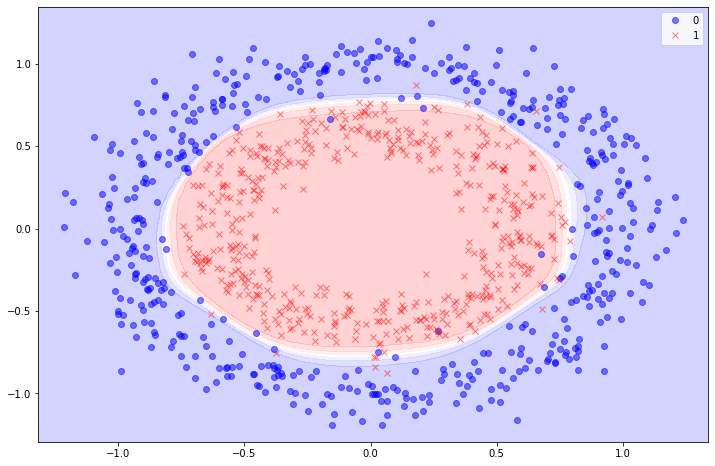

In [29]:
plot_decision_boundary(fun_model,X,y)